<a href="https://colab.research.google.com/github/Kunyarat4803/Python_dataviz2024/blob/main/final_dataviz_2024_653020567_7_%E0%B8%81%E0%B8%B1%E0%B8%A5%E0%B8%A2%E0%B8%A3%E0%B8%B1%E0%B8%95%E0%B8%99%E0%B9%8C_%E0%B8%AD%E0%B8%B4%E0%B8%99%E0%B8%97%E0%B8%A3%E0%B9%8C%E0%B8%AA%E0%B8%B3%E0%B8%A3%E0%B8%B2%E0%B8%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Exam 653020567-7 กัลยรัตน์ อินทร์สำราญ

โหลดข้อมูล Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing
ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift
ดังรูป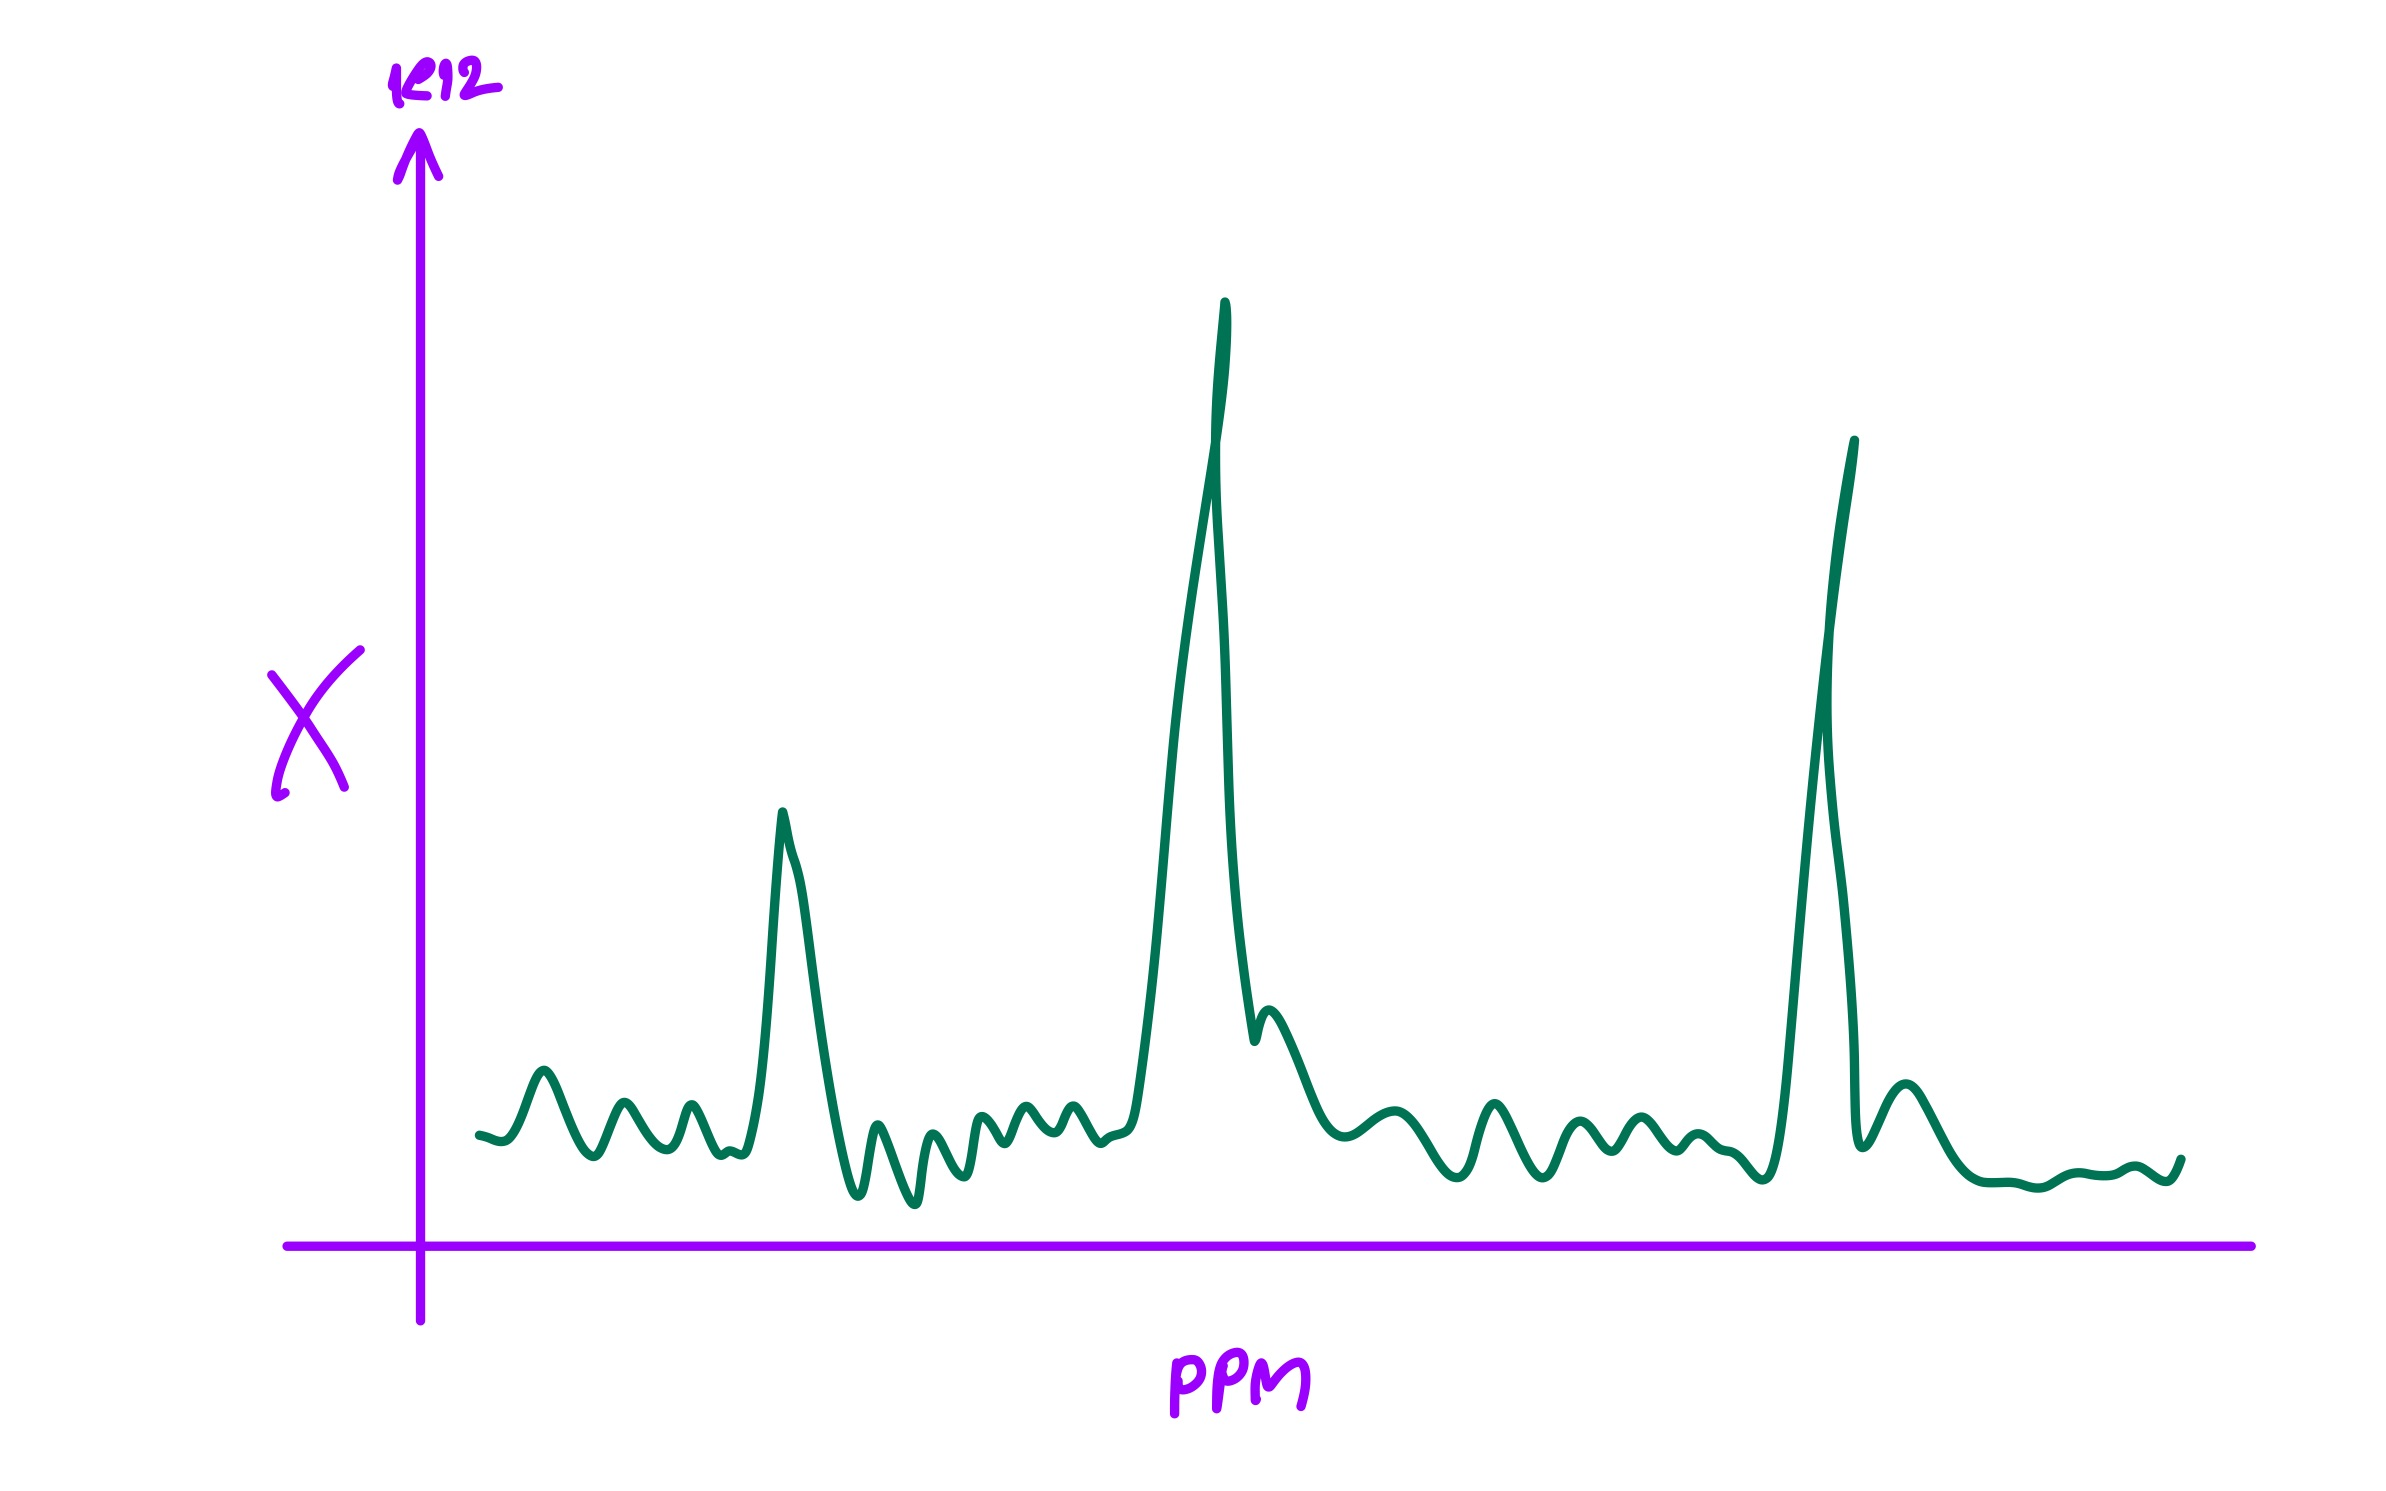

จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm $\leq$ 0 และ ppm $\geq$ 9.5)
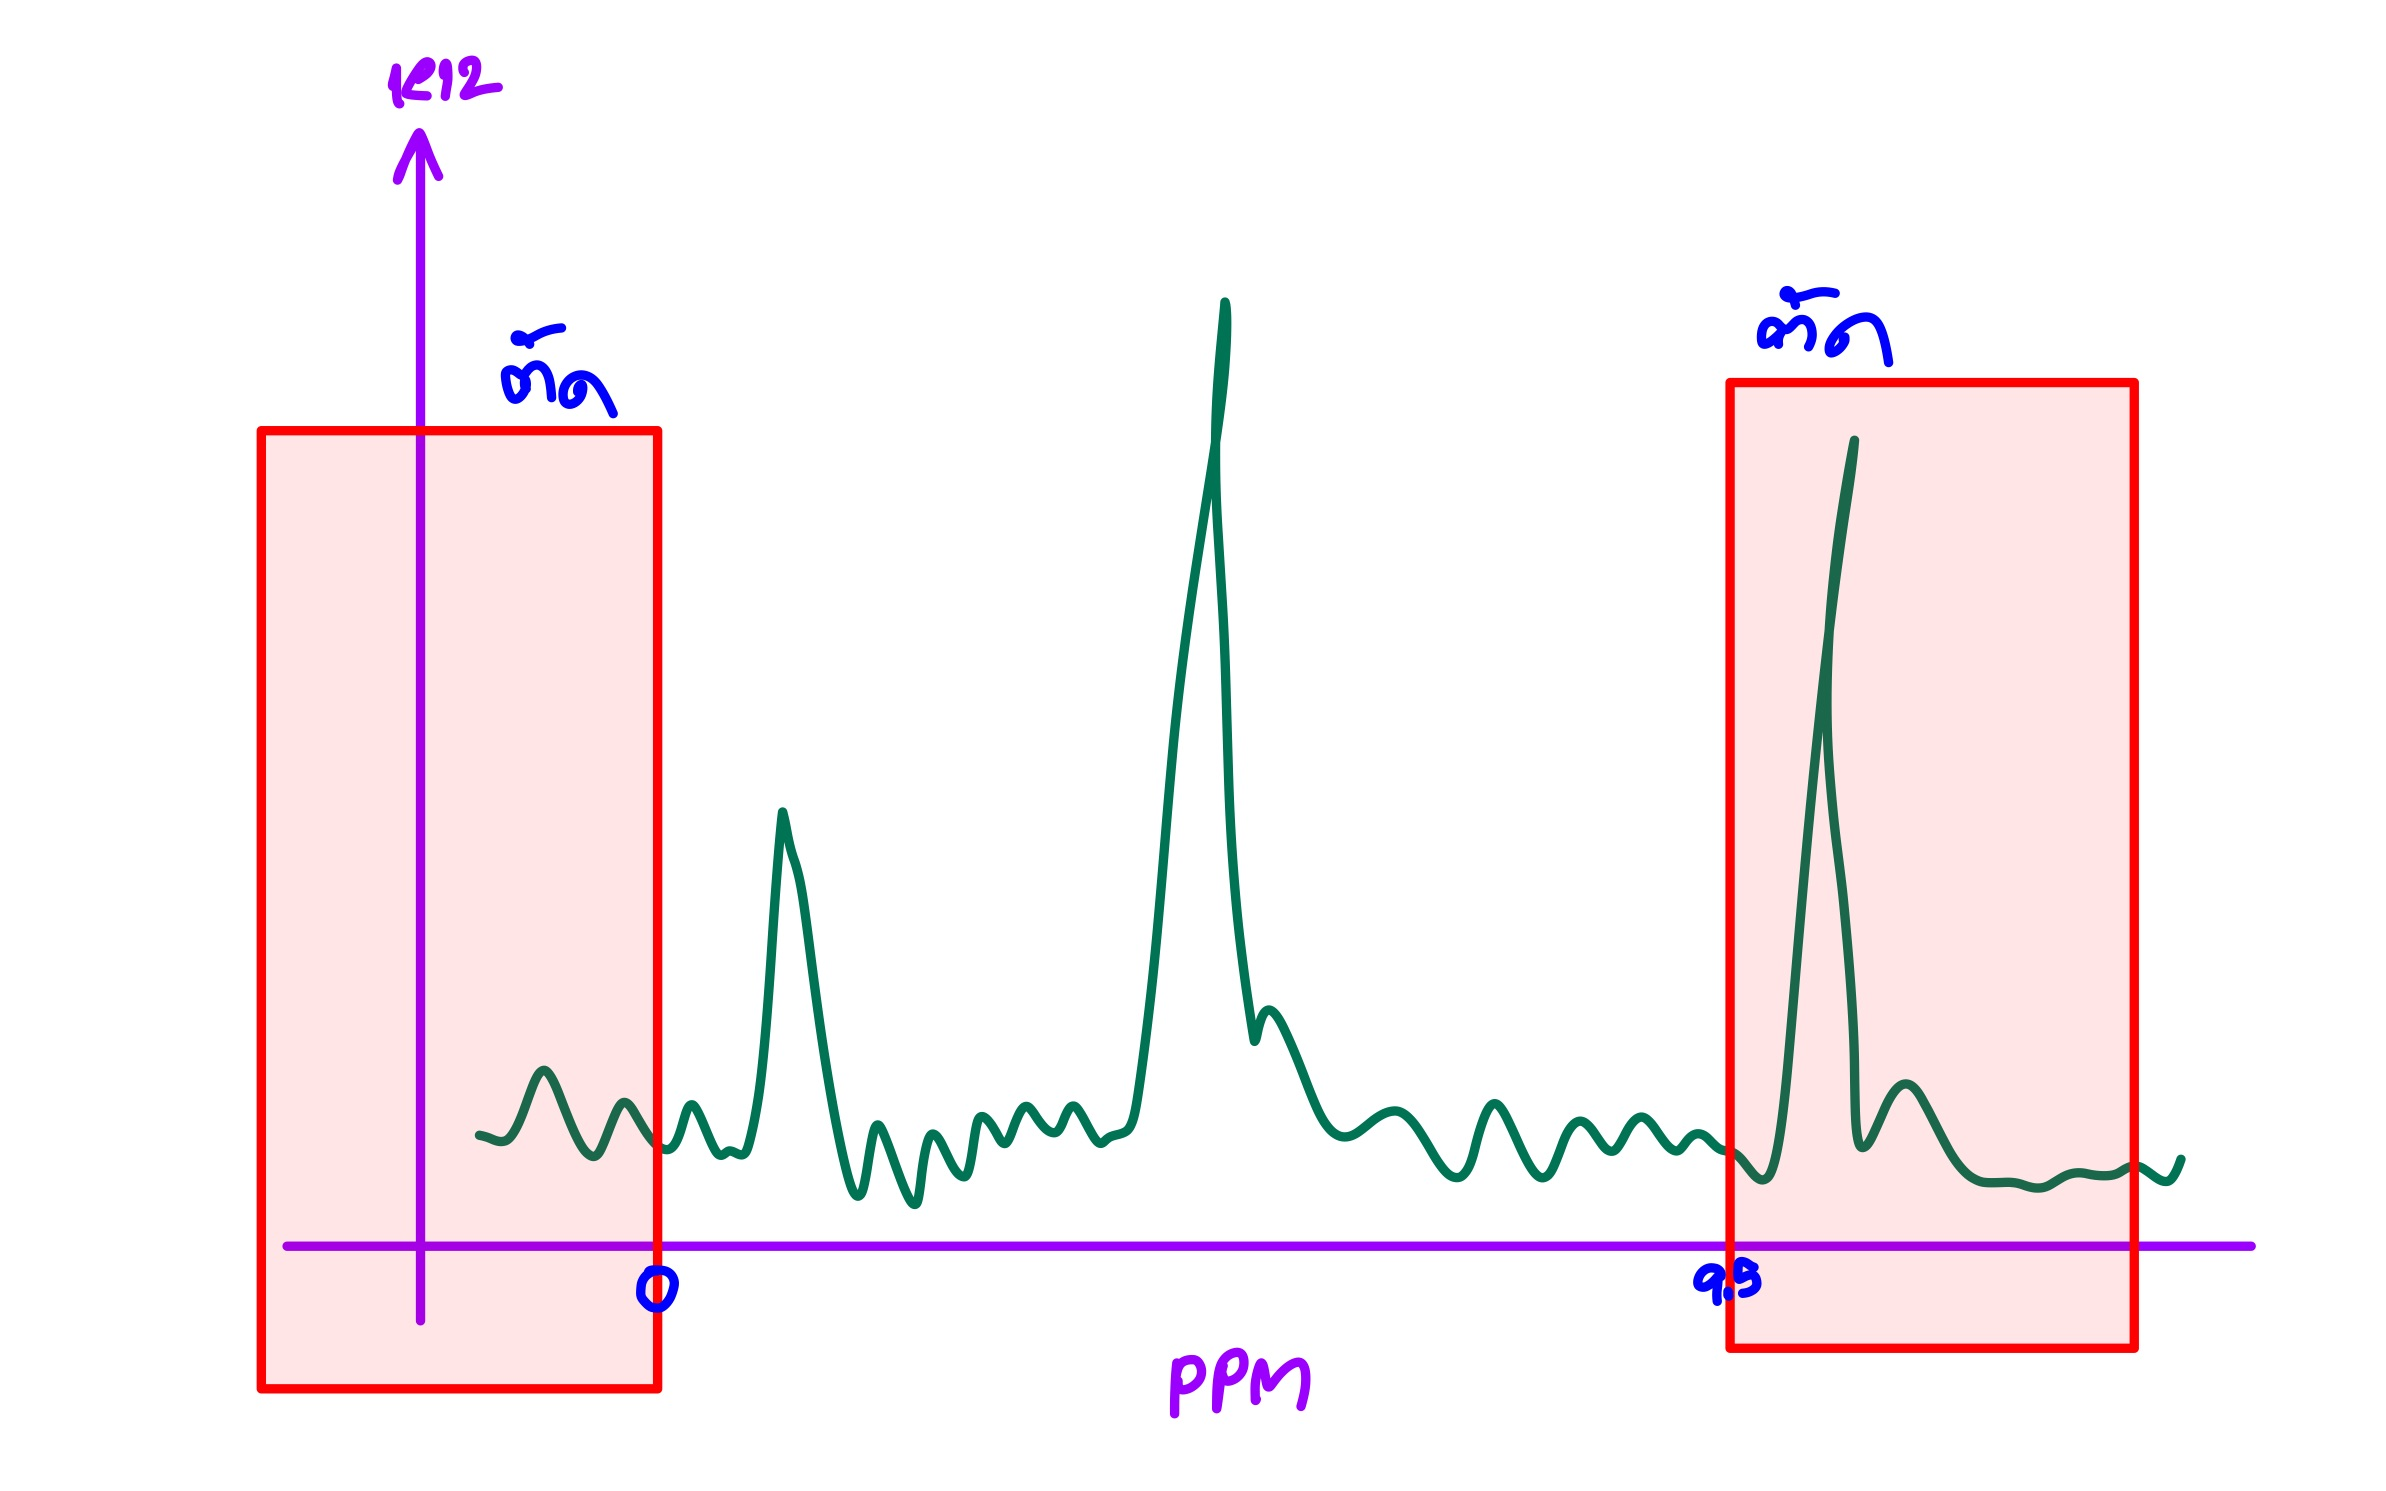

และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
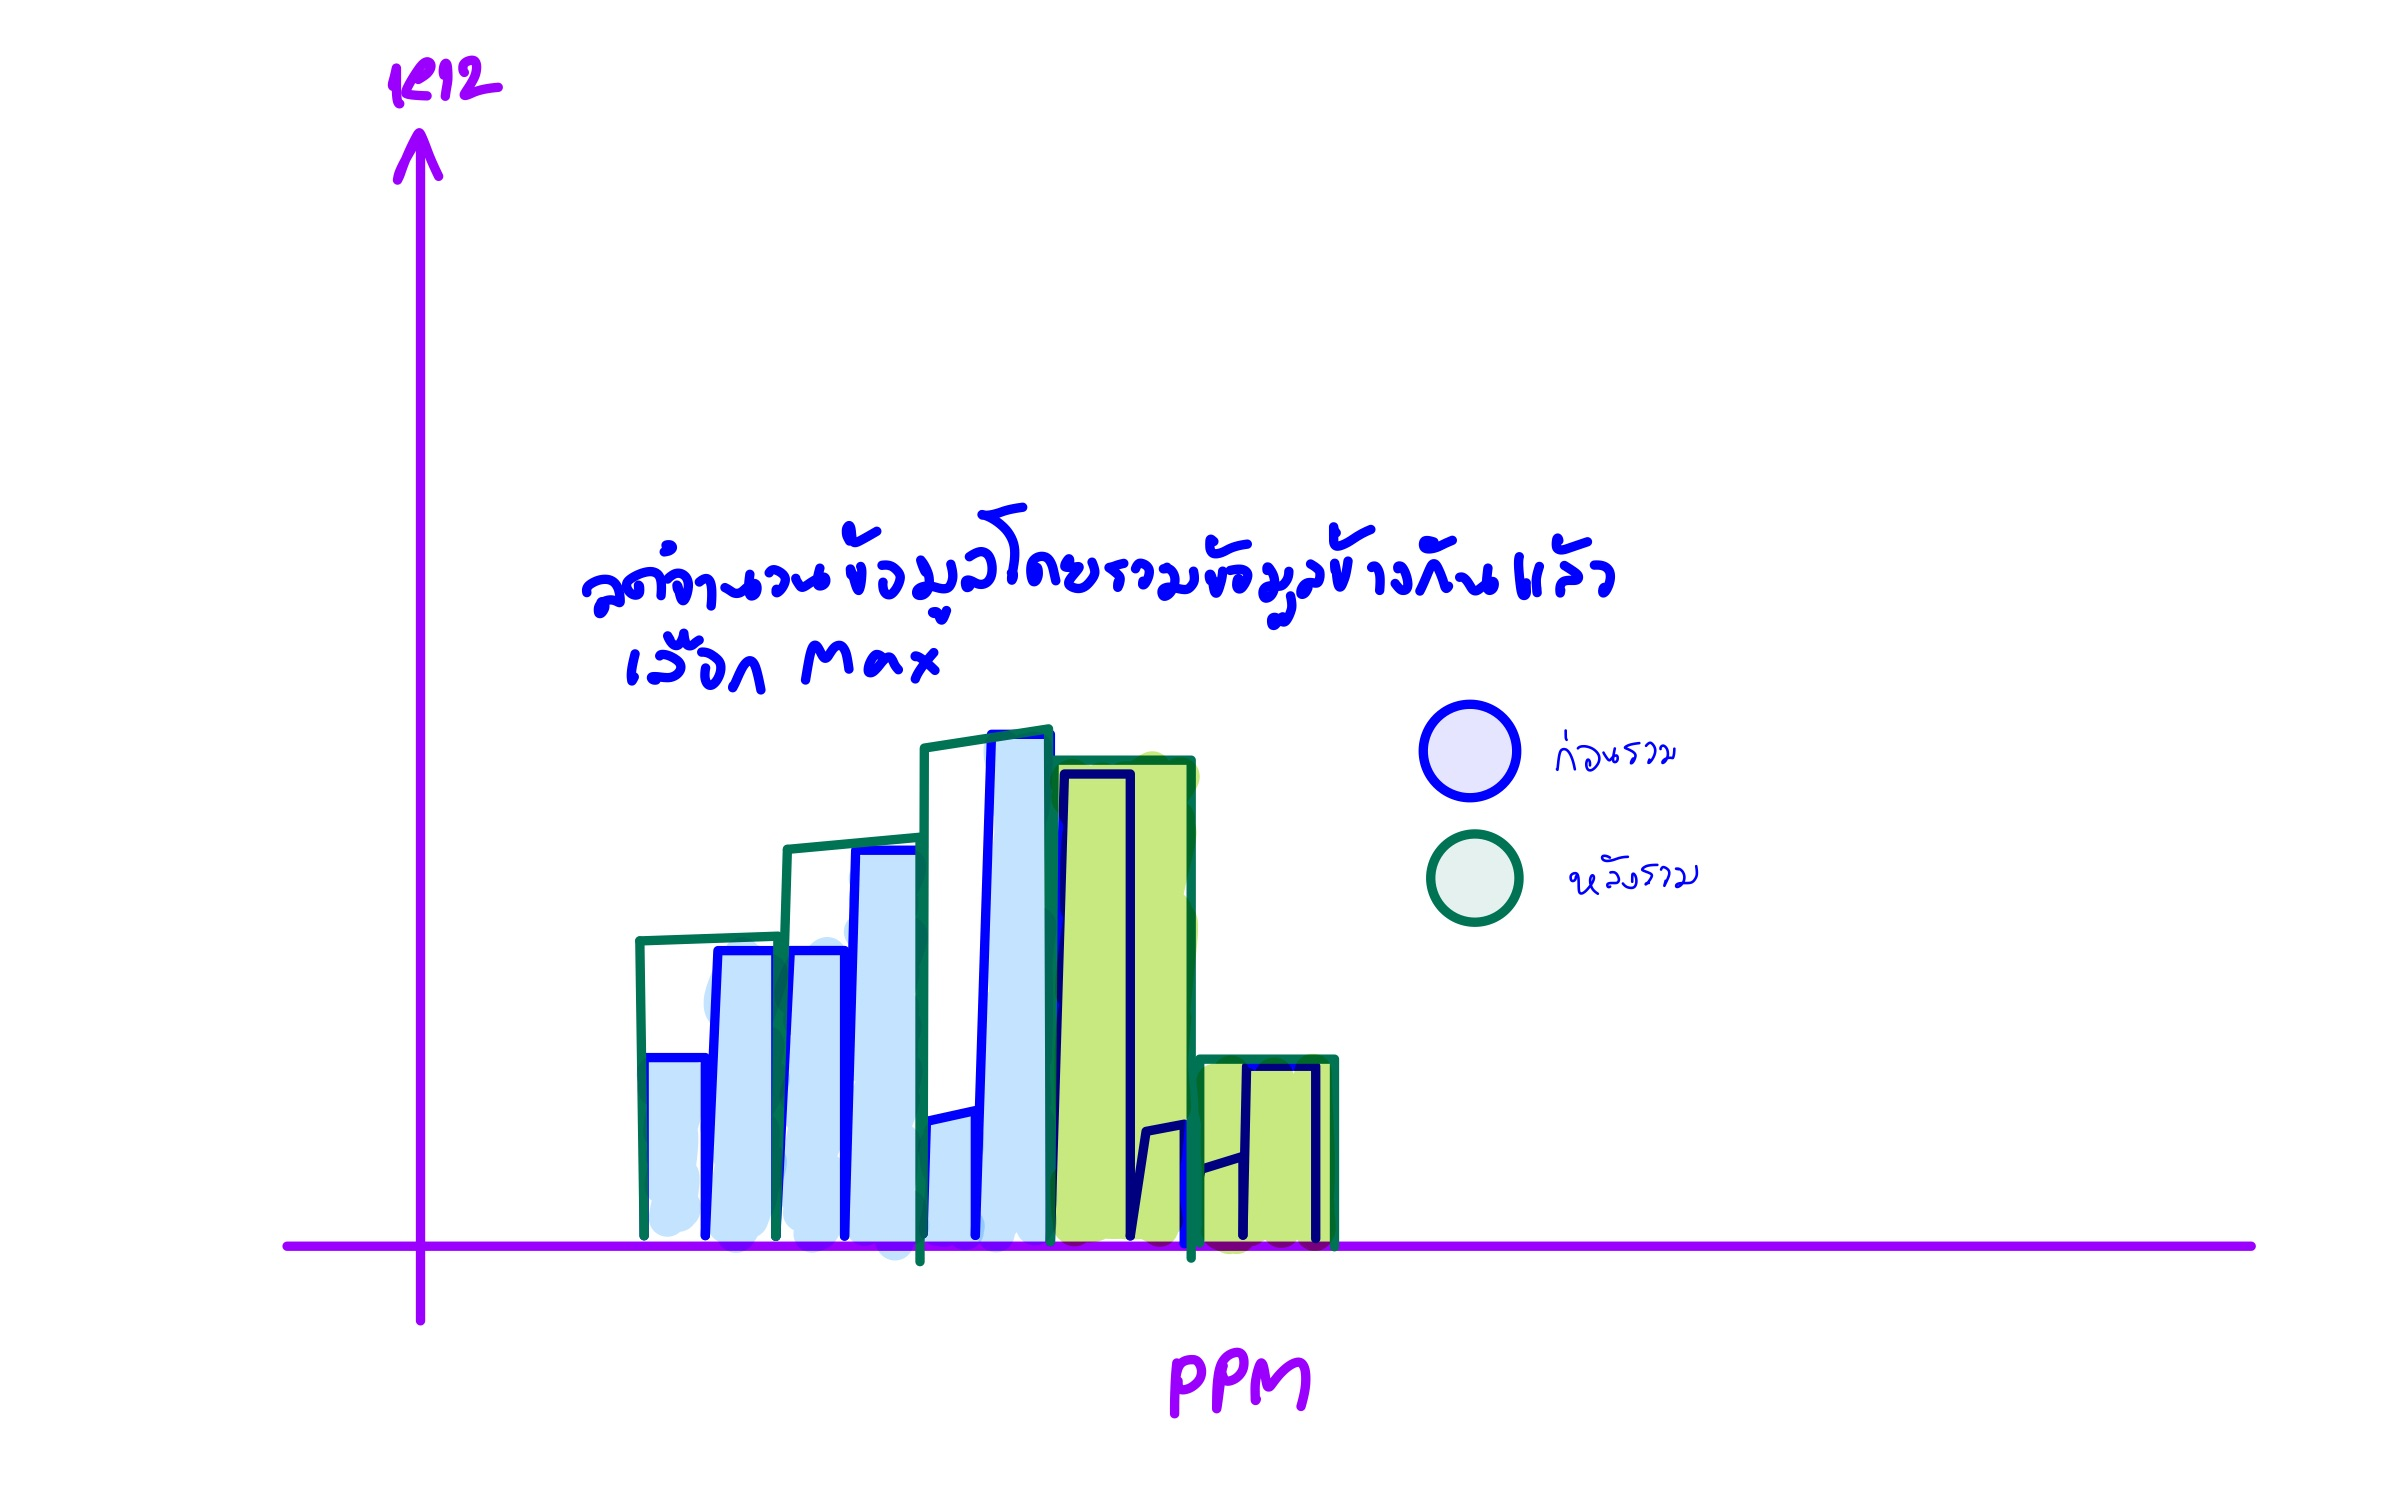

In [38]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Data_viz_2024_Data'

In [4]:
# กำหนด path ไปยังไฟล์ pickle
path = '/content/drive/MyDrive/data_viz_2024_Data/Xnn_ppm.pickle'  # เปลี่ยนให้ตรงกับ path ของคุณ

# เปิดและโหลดข้อมูลจากไฟล์ pickle
with open(path, 'rb') as f:
    Xnn_ppm = pickle.load(f)

# ตรวจสอบโครงสร้างของข้อมูล
# สมมติว่า Xnn_ppm เป็น tuple (X, ppm)
X = Xnn_ppm[0]  # ข้อมูลความเข้มข้น ขนาด 51x65536
ppm = Xnn_ppm[1]  # ข้อมูล Chemical shift ขนาด 65536

# สร้าง DataFrame จากข้อมูล X และตั้ง ppm เป็น column names
X_df = pd.DataFrame(X, columns=ppm)

# ตรวจสอบข้อมูล
X_df.head()


,10.871280,10.871095,10.870910,10.870725,10.870540,10.870354,10.870169,10.869984,10.869799,10.869614,...,-1.258974,-1.259159,-1.259344,-1.259529,-1.259714,-1.259900,-1.260085,-1.260270,-1.260455,-1.260640
0,1.369850e+07,1.369043e+07,1.278897e+07,1.240943e+07,1.330365e+07,1.426628e+07,1.414253e+07,1.329607e+07,1.220111e+07,1.107497e+07,...,5.704622e+05,1.359092e+06,1.139153e+06,4.073604e+05,-1.537015e+05,-8.236795e+04,6.450271e+05,1.886684e+06,3.117794e+06,3.349504e+06
1,8.556800e+06,7.907585e+06,7.289757e+06,6.754655e+06,6.380378e+06,6.139165e+06,5.988969e+06,6.183880e+06,6.556779e+06,6.460740e+06,...,1.365760e+06,1.365760e+06,1.365760e+06,1.365760e+06,1.365760e+06,1.365760e+06,1.365760e+06,1.365760e+06,1.365760e+06,1.365760e+06
2,4.740352e+06,4.740352e+06,4.740352e+06,4.740352e+06,4.740352e+06,4.740352e+06,4.740352e+06,4.740352e+06,4.740352e+06,4.740352e+06,...,-4.003645e+06,-4.418324e+06,-4.506833e+06,-3.926561e+06,-3.018297e+06,-2.396153e+06,-2.112734e+06,-2.022003e+06,-2.322528e+06,-3.078437e+06
3,7.544576e+06,7.544576e+06,7.544576e+06,7.544576e+06,7.544576e+06,7.544576e+06,7.544576e+06,7.544576e+06,7.544576e+06,7.544576e+06,...,-2.197907e+06,-2.538971e+06,-2.753699e+06,-2.495636e+06,-1.766855e+06,-8.486621e+05,-2.302021e+05,-1.990586e+05,-2.163733e+05,-2.163733e+05
4,1.145626e+07,1.145626e+07,1.145626e+07,1.145626e+07,1.145626e+07,1.145626e+07,1.145626e+07,1.145626e+07,1.145626e+07,1.145626e+07,...,-2.007353e+06,-2.839428e+06,-3.172685e+06,-3.094248e+06,-2.771903e+06,-2.455801e+06,-2.038807e+06,-1.716671e+06,-1.660351e+06,-1.660351e+06


ข้อสอบ
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

#preprocess ข้อมูลตามคำแนะนำข้างบน

In [5]:
# prompt: preprocess ข้อมูลตามคำแนะนำข้างบน
# เริ่มต้นด้วยการลบค่าที่เป็น NaN หรือ Infinity ออกจาก DataFrame
X_df = X_df.replace([np.inf, -np.inf], np.nan).dropna()

# ทำการปรับขนาดข้อมูล (Scaling) เช่น Min-Max scaling หรือ Standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# สร้าง DataFrame ใหม่จากข้อมูลที่ถูกปรับขนาด
X_scaled_df = pd.DataFrame(X_scaled, columns=X_df.columns)

# ตรวจสอบข้อมูลที่ถูก preprocess แล้ว
X_scaled_df.head()

,10.871280,10.871095,10.870910,10.870725,10.870540,10.870354,10.870169,10.869984,10.869799,10.869614,...,-1.258974,-1.259159,-1.259344,-1.259529,-1.259714,-1.259900,-1.260085,-1.260270,-1.260455,-1.260640
0,0.475171,0.475409,0.431992,0.413491,0.457255,0.505403,0.501889,0.463954,0.414575,0.363964,...,0.128111,0.136627,0.132716,0.121694,0.113386,0.114025,0.125157,0.145404,0.165369,0.169879
1,0.216685,0.184663,0.155396,0.129081,0.109281,0.097157,0.092221,0.106380,0.130627,0.131717,...,0.138466,0.136715,0.135713,0.134483,0.133799,0.133513,0.134839,0.138422,0.141861,0.143147
2,0.024824,0.025423,0.027167,0.027770,0.026851,0.026891,0.029486,0.033805,0.039248,0.045126,...,0.068551,0.060869,0.058053,0.063860,0.074903,0.082887,0.088112,0.093019,0.092376,0.083258
3,0.165799,0.166412,0.168212,0.168810,0.167796,0.167754,0.170381,0.174791,0.180320,0.186270,...,0.092064,0.085512,0.081237,0.082955,0.091715,0.103713,0.113400,0.117450,0.120634,0.121826
4,0.362448,0.363081,0.364960,0.365551,0.364403,0.364248,0.366920,0.371455,0.377104,0.383155,...,0.094545,0.081573,0.075696,0.074967,0.078213,0.082084,0.089105,0.097111,0.101260,0.102367


In [6]:
# แปลงข้อมูล X และ ppm ให้เป็น DataFrame
X_df = pd.DataFrame(X)
ppm_df = pd.Series(ppm)

# ตัดข้อมูลเฉพาะช่วงที่สนใจ
mask = (ppm_df > 0) & (ppm_df < 9.5)
X_filtered = X_df.loc[:, mask]
ppm_filtered = ppm_df[mask]
# กำหนดจำนวนบล็อกที่ต้องการลดขนาดลง
num_bins = 400

# ฟังก์ชันสำหรับลดขนาดข้อมูล
def quantize_data(data, num_bins):
    bin_size = data.shape[1] // num_bins
    quantized_data = data.iloc[:, :bin_size * num_bins].groupby(
        np.arange(bin_size * num_bins) // bin_size, axis=1 # np is now defined
    ).mean()
    return quantized_data
    # ใช้ฟังก์ชันกับข้อมูล
X_quantized = quantize_data(X_filtered, num_bins)
# หาค่าสูงสุดของแต่ละ sample
X_max = X_quantized.max(axis=1)
print(X_max)

0     1.679153e+10
1     1.686414e+10
2     1.264260e+10
3     1.250387e+10
4     2.063778e+10
5     1.554151e+10
6     1.311714e+10
7     2.085001e+10
8     1.965862e+10
9     1.516918e+10
10    1.465684e+10
11    1.278495e+10
12    1.913548e+10
13    1.932393e+10
14    1.320079e+10
15    1.410535e+10
16    1.051584e+10
17    1.511048e+10
18    1.238912e+10
19    1.384553e+10
20    1.420574e+10
21    1.396117e+10
22    2.057134e+10
23    2.493340e+10
24    1.053758e+10
25    1.547545e+10
26    1.154383e+10
27    1.240034e+10
28    7.718256e+09
29    1.644339e+10
30    1.939997e+10
31    9.015004e+10
32    2.049145e+11
33    1.904835e+11
34    2.396483e+11
35    4.415460e+11
36    2.204925e+11
37    1.768514e+11
38    5.372975e+11
39    2.497286e+11
40    2.014554e+11
41    1.875064e+11
42    1.442151e+11
43    1.500421e+11
44    1.624123e+11
45    3.196588e+11
46    1.731057e+11
47    1.602739e+11
48    2.362747e+11
49    7.010384e+10
50    1.771007e+11
dtype: float64


<ipython-input-6-e92d7be8fdc1>:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  quantized_data = data.iloc[:, :bin_size * num_bins].groupby(


จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm  ≤  0 และ ppm  ≥  9.5)

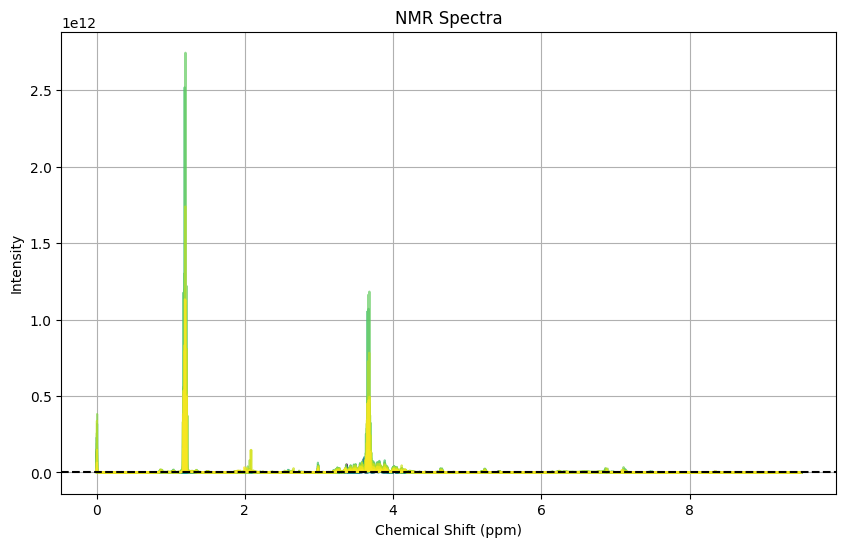

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# สมมติว่า X และ ppm ถูกโหลดจากไฟล์ pickle ตามที่เคยทำมาก่อน
# X = ...
# ppm = ...

# 1. กรองข้อมูล
mask = (ppm > 0) & (ppm < 9.5)
X_filtered = X[:, mask]
ppm_filtered = ppm[mask]

# 2. สร้างกราฟ
fig, ax = plt.subplots(figsize=(10, 6))  # ปรับขนาดตามที่ต้องการ

# กำหนดสีที่จะใช้
color_palette = plt.cm.viridis(np.linspace(0, 1, X_filtered.shape[0]))

# วนลูปผ่านแต่ละตัวอย่าง (row) ใน X_filtered
for i in range(X_filtered.shape[0]):
    # วาดข้อมูลสำหรับตัวอย่างปัจจุบัน
    ax.plot(ppm_filtered, X_filtered[i, :], color=color_palette[i], alpha=0.7)  # เปลี่ยนสีตามที่กำหนด

# ปรับแต่งกราฟ
ax.set_xlabel('Chemical Shift (ppm)')
ax.set_ylabel('Intensity')
ax.set_title('NMR Spectra')
ax.grid(True)

# เพิ่มเส้นฐานที่ y=0
ax.axhline(y=0, color='black', linestyle='--')

# แสดงกราฟ
plt.show()


และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X

Quantized Data Shape: (51, 400)


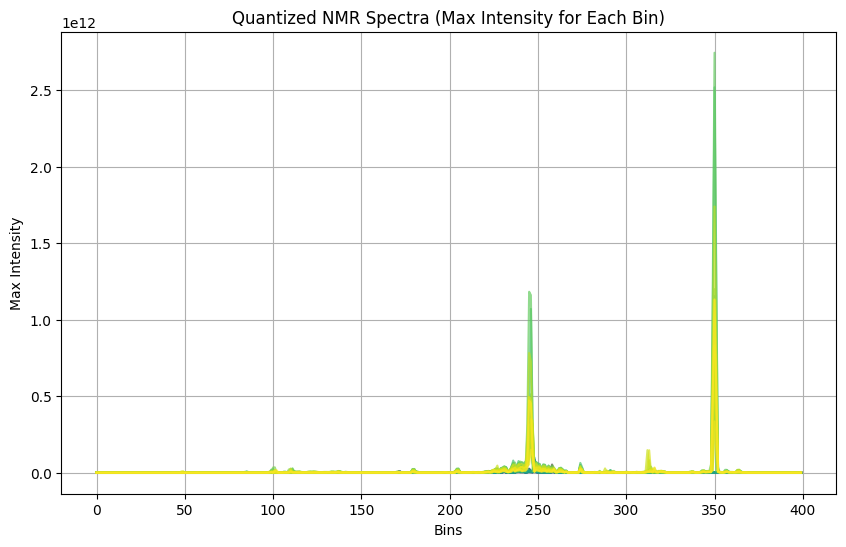

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# สมมติว่า X และ ppm ถูกโหลดจากไฟล์ pickle ตามที่เคยทำมาก่อน
# X = ...
# ppm = ...

# 1. กรองข้อมูล
mask = (ppm > 0) & (ppm < 9.5)
X_filtered = X[:, mask]
ppm_filtered = ppm[mask]

# 2. ตรวจสอบให้แน่ใจว่ามีข้อมูลมากพอสำหรับการ quantization
n_samples, n_features = X_filtered.shape
target_rows = 51
target_cols = 400

# ตรวจสอบจำนวนแถวที่มี
if n_samples < target_rows:
    raise ValueError("มีจำนวนแถวไม่เพียงพอสำหรับการ quantization")

# ตัดข้อมูลให้มีจำนวนแถวตามที่ต้องการ
X_filtered = X_filtered[:target_rows, :]

# 3. Quantize ข้อมูล
# กำหนดขนาดบล็อกเพื่อรวมข้อมูล
block_size = n_features // target_cols

# 4. สร้างอาเรย์สำหรับเก็บข้อมูลที่ quantized
X_quantized = np.empty((target_rows, target_cols))

# คำนวณค่า maximum สำหรับแต่ละบล็อก
for i in range(target_cols):
    start_idx = i * block_size
    end_idx = start_idx + block_size
    # ใช้ค่า maximum จากแต่ละบล็อก
    X_quantized[:, i] = X_filtered[:, start_idx:end_idx].max(axis=1)

# 5. แสดงผลลัพธ์
print("Quantized Data Shape:", X_quantized.shape)  # ควรแสดง (51, 400)

# 6. สร้างกราฟเพื่อแสดงข้อมูล quantized
fig, ax = plt.subplots(figsize=(10, 6))

# ใช้สีที่แตกต่างกันเพื่อแสดงข้อมูลแต่ละแถว
color_palette = plt.cm.viridis(np.linspace(0, 1, target_rows))

# วนลูปผ่านแต่ละตัวอย่าง (row) ใน X_quantized
for i in range(X_quantized.shape[0]):
    ax.plot(range(target_cols), X_quantized[i, :], color=color_palette[i], alpha=0.7)

# ปรับแต่งกราฟ
ax.set_xlabel('Bins')
ax.set_ylabel('Max Intensity')
ax.set_title('Quantized NMR Spectra (Max Intensity for Each Bin)')
ax.grid(True)

# แสดงกราฟ
plt.show()


#ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้

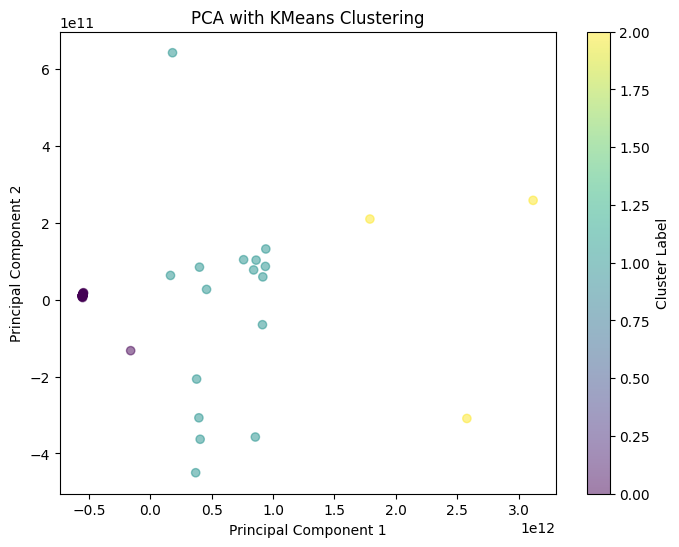

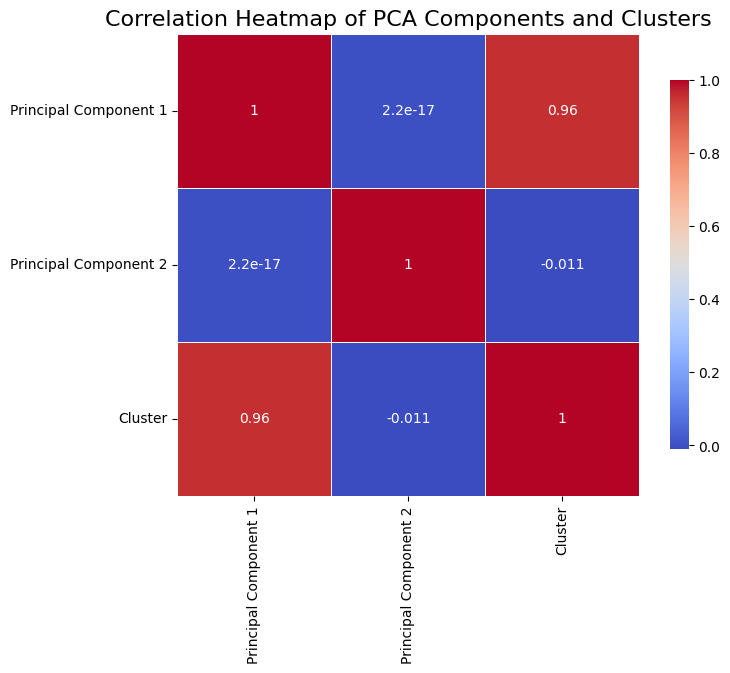

In [55]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. นำเข้าข้อมูล
# สมมติว่า X_quantized เป็นข้อมูลที่ได้จากการ preprocess
# ตัวอย่างการสร้างข้อมูลเพื่อทดสอบ
# X_quantized = np.random.rand(100, 400)  # ตัวอย่างข้อมูล 100 แถว 400 คอลัมน์

# 2. ทำ PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_quantized)

# สร้าง DataFrame สำหรับ principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# 3. ใช้ KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # ปรับจำนวน clusters ตามที่ต้องการ
kmeans.fit(principalDf)
labels = kmeans.labels_

# เพิ่ม labels ลงใน DataFrame
principalDf['Cluster'] = labels

# 4. Visualize PCA และ KMeans Clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'],
                      c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with KMeans Clustering')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

# 5. สร้าง Heatmap
# สร้าง Correlation Matrix
corr = principalDf[['Principal Component 1', 'Principal Component 2', 'Cluster']].corr()

# สร้าง heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Heatmap of PCA Components and Clusters', fontsize=16)
plt.show()


#visualize ข้อมูลทั้ง 51 จุด

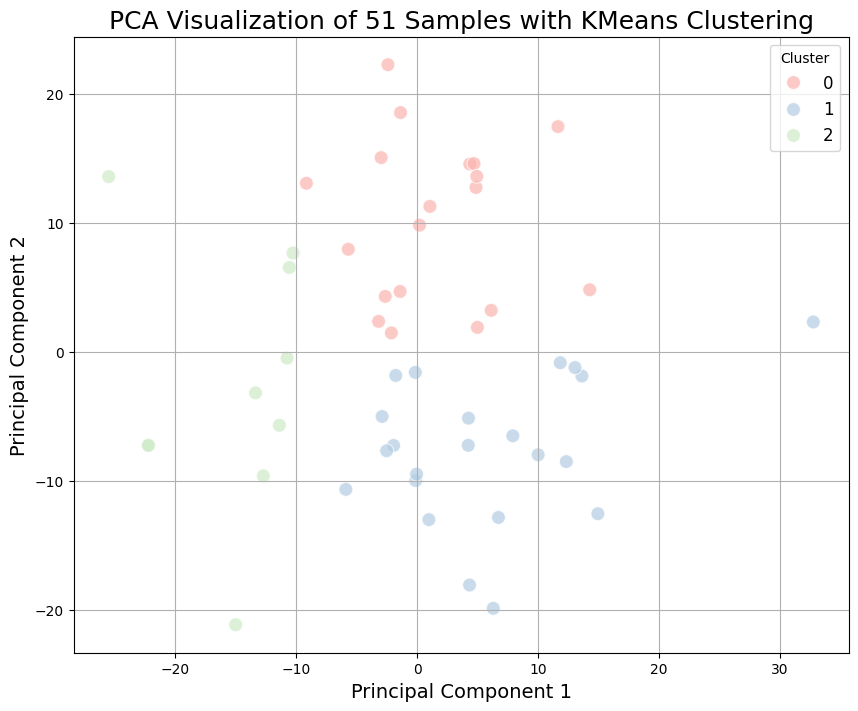

In [58]:
# 1. นำเข้าข้อมูล
# สมมติว่า X_quantized เป็นข้อมูลที่ได้จากการ preprocess
# สำหรับตัวอย่างนี้ คุณสามารถใช้ข้อมูล dummy ขนาด (51, 65536) ได้
# ตัวอย่างข้อมูลจำลอง (หากคุณมีข้อมูลจริงให้เปลี่ยนเป็นการโหลดข้อมูลจริง)
X_quantized = np.random.rand(51, 65536)

# 2. ทำ PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_quantized)

# สร้าง DataFrame สำหรับ principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# 3. ใช้ KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # กำหนด random_state เพื่อให้ได้ผลลัพธ์ที่สามารถทำซ้ำได้
kmeans.fit(principalDf)
labels = kmeans.labels_

# เพิ่ม labels ลงใน DataFrame
principalDf['Cluster'] = labels

# 4. Visualize PCA และ KMeans Clustering
plt.figure(figsize=(10, 8))
palette = sns.color_palette("Pastel1", n_colors=3)  # ใช้พาเลตสีอ่อน
sns.scatterplot(data=principalDf, x='Principal Component 1', y='Principal Component 2',
                hue='Cluster', palette=palette, s=100, alpha=0.7, edgecolor='w')

plt.title('PCA Visualization of 51 Samples with KMeans Clustering', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()


#ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี

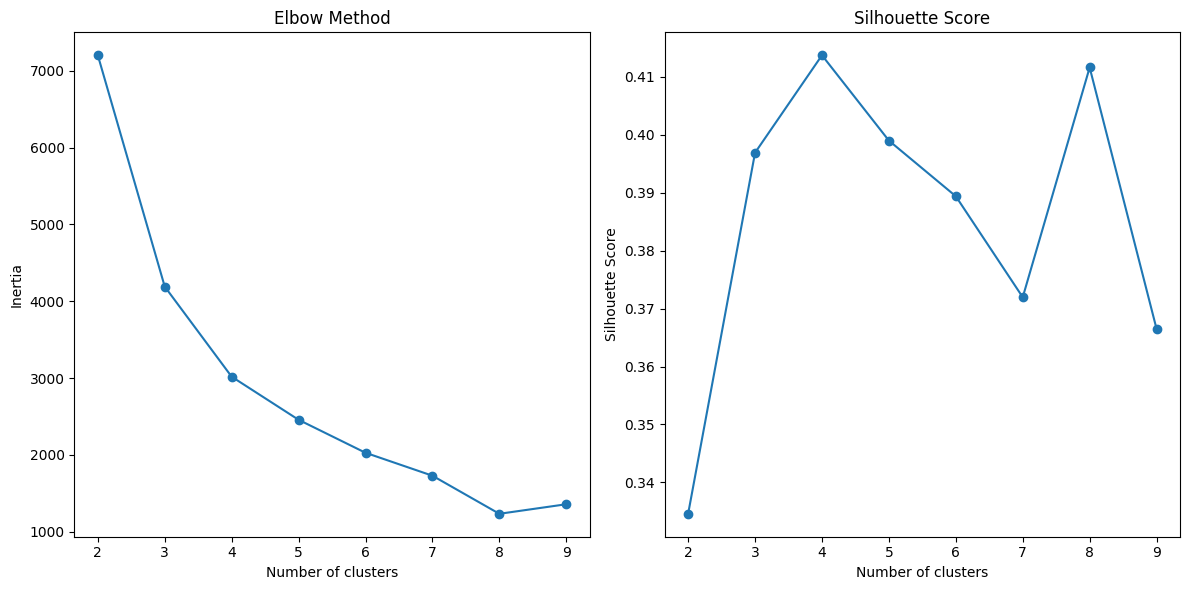

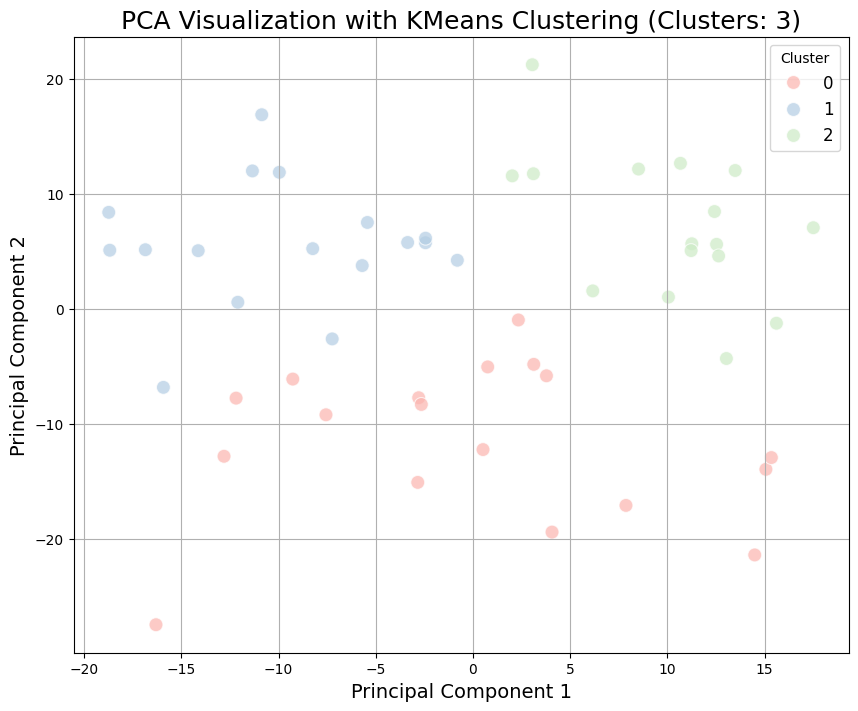

จำนวนกลุ่มที่ได้จากการจัดกลุ่ม: 3


In [61]:
# 1. นำเข้าข้อมูล
# สมมติว่า X_quantized เป็นข้อมูลที่ได้จากการ preprocess
# X_quantized = ...

# 2. ทำ PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_quantized)

# สร้าง DataFrame สำหรับ principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# 3. ค้นหาจำนวน clusters ที่เหมาะสมด้วย Elbow Method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 10)  # ทดลองกับจำนวน clusters จาก 2 ถึง 9

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(principalDf)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(principalDf, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# 4. ใช้ KMeans ด้วยจำนวน clusters ที่ดีที่สุด
optimal_n_clusters = 3  # กำหนดจำนวน clusters ที่เหมาะสม (จากการวิเคราะห์)
kmeans = KMeans(n_clusters=optimal_n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_

# เพิ่ม labels ลงใน DataFrame
principalDf['Cluster'] = labels

# 5. Visualize PCA และ KMeans Clustering
plt.figure(figsize=(10, 8))
palette = sns.color_palette("Pastel1", n_colors=optimal_n_clusters)  # ใช้พาเลตสีอ่อน
sns.scatterplot(data=principalDf, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette=palette, s=100, alpha=0.7, edgecolor='w')

plt.title(f'PCA Visualization with KMeans Clustering (Clusters: {optimal_n_clusters})', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()

# 6. ตอบคำถามเกี่ยวกับจำนวนกลุ่ม
print(f'จำนวนกลุ่มที่ได้จากการจัดกลุ่ม: {optimal_n_clusters}')


#สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. นำเข้าข้อมูล
# สมมติว่า X_quantized เป็นข้อมูลที่ได้จากการ preprocess
# X_quantized = ...

# 2. ทำ PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_quantized)

# สร้าง DataFrame สำหรับ principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# 3. ใช้ KMeans Clustering
optimal_n_clusters = 3  # กำหนดจำนวน clusters ที่ต้องการ
kmeans = KMeans(n_clusters=optimal_n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_

# เพิ่ม labels ลงใน DataFrame
principalDf['Cluster'] = labels

# 4. สร้างตารางผลลัพธ์
result_df = pd.DataFrame({
    'Principal Component 1': principalDf['Principal Component 1'],
    'Principal Component 2': principalDf['Principal Component 2'],
    'Cluster': principalDf['Cluster']
})

# แสดงผลตาราง
result_df


,Principal Component 1,Principal Component 2,Cluster
0,4.514024,-2.527522,1
1,-14.857417,7.054937,2
2,6.854862,3.519165,1
3,0.953739,-16.779734,0
4,2.410088,11.288603,1
5,4.925364,-16.417536,0
6,-5.237016,-1.721816,2
7,-6.980875,4.064841,2
8,11.932411,3.687187,1
9,-31.676153,13.459173,2
